In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
pd.set_option('display.max_rows',None)
sns.set()

In [2]:
files = [i for i in os.listdir() if i.endswith('.xlsx') or i.endswith('xls')]

In [3]:
files =files[:3]
files

['12. State Wise Voters Turn Out.xls',
 'Detailed Results_TN_2016.xlsx',
 'LS_2019_State Wise Seat Won & Valid Votes Polled by Political Parties.xls']

In [4]:
def annotate_bar(bars,h=False,roundup=2):
    if not h:
        for p in bars.patches:
            bars.annotate(str(round(p.get_height(),roundup)), (p.get_x() * 1.005, p.get_height() * 1.009))
    elif h :
        for p in bars.patches:
            bars.annotate(str(round(p.get_width(),roundup)), (p.get_width() * 1.005, p.get_y()*1.005))

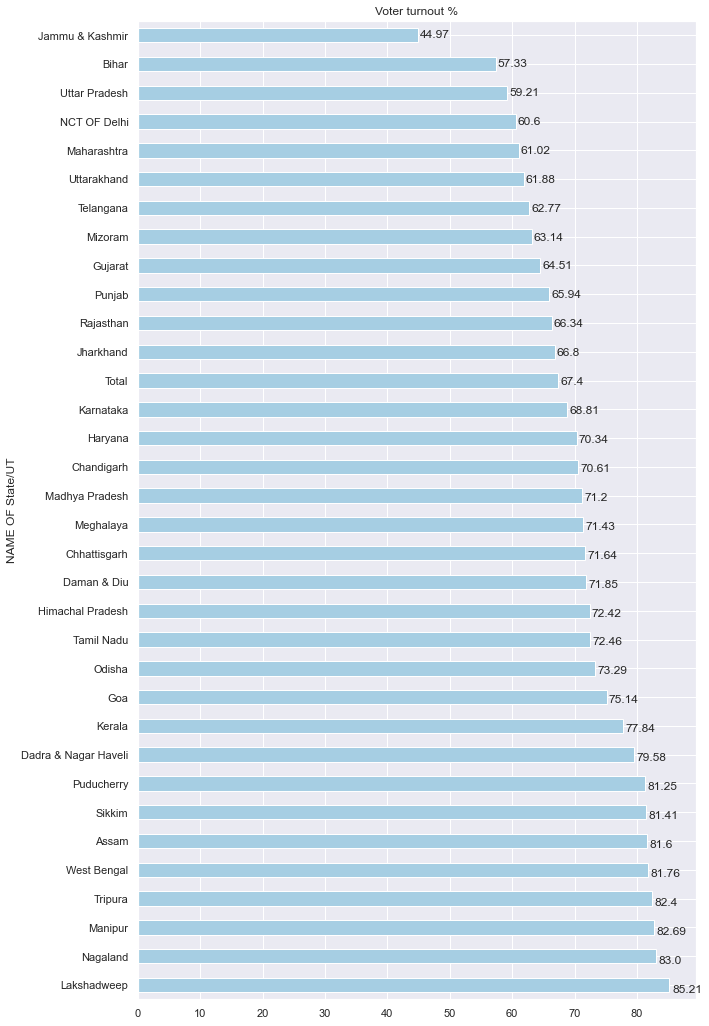

In [5]:
df = pd.read_excel(files[0],header=3).dropna()
df = df.iloc[3:]
bars=df.sort_values('VOTERS TOUROUT %',ascending=False).set_index('NAME OF State/UT').plot(kind='barh',legend=False,
                                                                                      y='VOTERS TOUROUT %',ylim=(40,90),
                                                                                           colormap='Paired',
                                                                                     figsize=(10,18),title='Voter turnout %')
annotate_bar(bars,True)

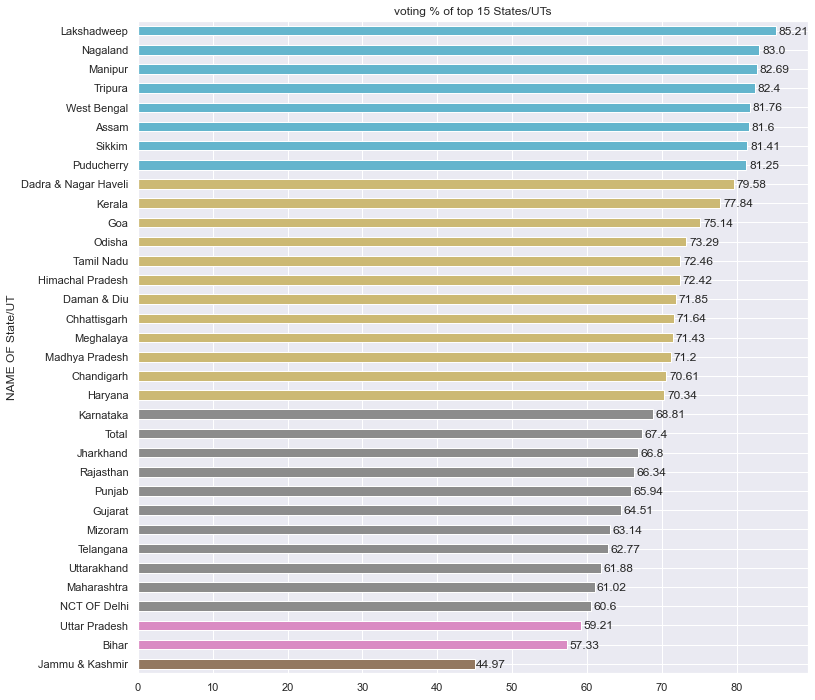

In [6]:
voters= df.sort_values('VOTERS TOUROUT %',ascending=False).set_index('NAME OF State/UT')[['VOTERS TOUROUT %']]
voters['color']=pd.cut(voters['VOTERS TOUROUT %'],[40,50,60,70,80,90])
voters['color_code'] = 'C'+voters.color.astype(str).str.slice(1,2,1)+voters.color.astype(str).str.slice(5,6,1)
ax=voters['VOTERS TOUROUT %'].plot(kind='barh', color=voters.color_code, title= 'voting % of top 15 States/UTs', figsize=(12,12))
#annotate_bar(ax,True,roundup=2)
for p in ax.patches:
    ax.annotate(str(round(p.get_width(),2)), (p.get_width() * 1.005, p.get_y()+0.45))
plt.gca().invert_yaxis()

In [7]:
df['postal per general'] = df.POSTAL/df['GENERAL (INCLUDING INRs)']*100
df['postal per evm'] = df.POSTAL/df['EVM']*100
df.sort_values('VOTERS TOUROUT %',ascending=False)[0:15]#[['NAME OF State/UT']]

,NAME OF State/UT,GENERAL (INCLUDING INRs),SERVICE,EVM,POSTAL,VOTERS TOUROUT %,postal per general,postal per evm
17,Lakshadweep,55057.0,132.0,46877.0,149.0,85.209009,0.270629,0.317853
23,Nagaland,1206287.0,7490.0,1002142.0,5295.0,83.000172,0.438950,0.528368
20,Manipur,1939244.0,20319.0,1606408.0,14043.0,82.694509,0.724148,0.874186
32,Tripura,2605325.0,9393.0,2142275.0,12275.0,82.400855,0.471150,0.572989
35,West Bengal,69891751.0,109533.0,57097266.0,132752.0,81.755669,0.189939,0.232502
3,Assam,21991112.0,58947.0,17932885.0,59868.0,81.599569,0.272237,0.333845
29,Sikkim,432306.0,1822.0,339880.0,13535.0,81.408018,3.130884,3.982288
26,Puducherry,973161.0,249.0,790252.0,643.0,81.249936,0.066073,0.081366
7,Dadra & Nagar Haveli,250021.0,8.0,198925.0,59.0,79.584368,0.023598,0.029659
16,Kerala,26151534.0,53302.0,20311641.0,85527.0,77.837419,0.327044,0.421074


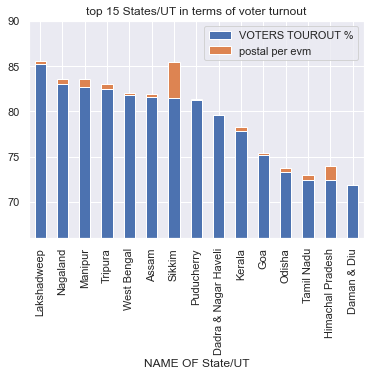

In [8]:
sns.set()
bars=df.sort_values('VOTERS TOUROUT %',ascending=False)[0:15].plot(kind='bar',
                                                             x='NAME OF State/UT',
                                                             y=['VOTERS TOUROUT %','postal per evm'],
                                                              rot=90,ylim=(66,90),stacked=True,
                                                            alpha=1,title='top 15 States/UT in terms of voter turnout')


<AxesSubplot:title={'center':'Top 15 States/UT with highest postal votes per 100 voters'}, xlabel='NAME OF State/UT'>

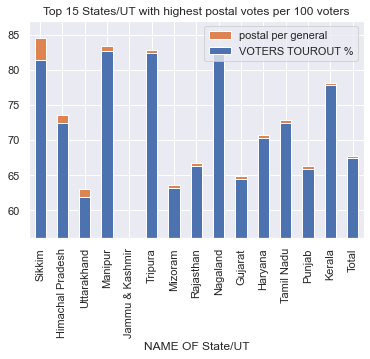

In [9]:
df.sort_values('postal per general',ascending=False)[0:15].plot(kind='bar',
                                                             x='NAME OF State/UT',
                                                             y=['VOTERS TOUROUT %','postal per general'],
                                                              rot=90,ylim=(56,87),stacked=True,
                                                            alpha=1, legend='reverse',title='Top 15 States/UT with highest postal votes per 100 voters')

In [10]:
tn = pd.read_excel(files[1],header=2).dropna()
tn.tail()

,Constituency No.,Constituency Name,Candidate Name,Candidate Sex,Candidate Age,Candidate Category,Party Name,VALID VOTES POLLED in General,VALID VOTES POLLED in Postal,Total Valid Votes,Total Electors,Total Votes
4005,234,Killiyoor,VATHANA NISHA J,F,36.0,GEN,IND,292.0,0.0,292.0,252676.0,153273.0
4006,234,Killiyoor,SUNIL BABU K,M,41.0,GEN,IND,282.0,0.0,282.0,252676.0,153273.0
4007,234,Killiyoor,THANKAMONY C,M,57.0,GEN,ICF,253.0,0.0,253.0,252676.0,153273.0
4008,234,Killiyoor,PAL RAJ M,M,49.0,GEN,IND,246.0,1.0,247.0,252676.0,153273.0
4009,234,Killiyoor,DHANAPAUL P,M,53.0,GEN,CPIM,162.0,0.0,162.0,252676.0,153273.0


In [11]:
tn.groupby('Candidate Sex')['Candidate Age',' Total Valid Votes'].agg({np.mean,np.count_nonzero})

<ipython-input-11-c3b3966ec4f0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tn.groupby('Candidate Sex')['Candidate Age',' Total Valid Votes'].agg({np.mean,np.count_nonzero})


Candidate Age                Total Valid Votes              
                       mean count_nonzero               mean count_nonzero
Candidate Sex                                                             
F                 41.381250         320.0       13786.384375         320.0
M                 44.309454        3406.0       11224.226072        3406.0
O                 32.000000           2.0        1313.500000           2.0

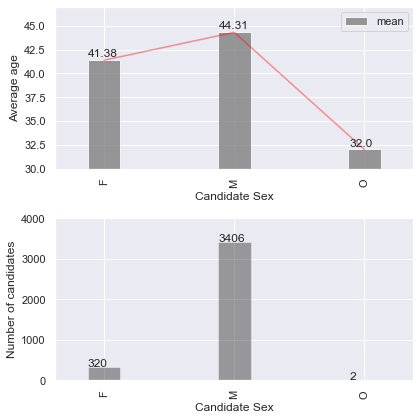

In [12]:
fig,ax=plt.subplots(2,figsize=(6,6))
tn.groupby('Candidate Sex')['Candidate Age'].agg({np.mean}).plot(kind='line', color=['red'],ax=ax[0],alpha=0.4,legend=False)
bars=tn.groupby('Candidate Sex')['Candidate Age'].agg({np.mean}).plot(kind='bar', color=['grey'],ax=ax[0], ylabel='Average age',
                                                                 alpha=0.8,ylim=(30,47),width=0.25
                                                                )
annotate_bar(bars)

bars=tn.groupby('Candidate Sex')['Candidate Sex'].agg({np.count_nonzero}).plot(kind='bar', color='k',ax=ax[1],width=0.25,ylim=(0,4000),
                                                                          ylabel='Number of candidates',alpha=0.4,legend=False)

annotate_bar(bars)
plt.tight_layout()

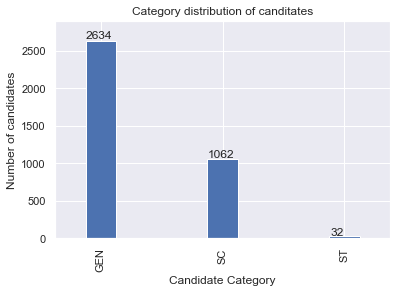

In [13]:
ax=tn.groupby(['Candidate Category'])[['Candidate Name']].count().plot(kind='bar',legend=False,width=0.25,ylim=(0,2900),
                                                                    title='Category distribution of canditates', 
                                                                    ylabel='Number of candidates')
annotate_bar(ax)

In [14]:


gender = tn.groupby([' Party Name','Candidate Sex'])[['Candidate Name']].count().unstack().fillna(0)
gender.columns =['f','m','o']
gender['total']=gender.sum(axis=1)
gender['score']=(gender.f/gender.total)*100
gender[gender.total>23].sort_values('score', ascending=False)[:15]

,f,m,o,total,score
Party Name,,,,,
VCK,5.0,20.0,0.0,25.0,20.000000
SP,5.0,21.0,0.0,26.0,19.230769
NTK,43.0,185.0,1.0,229.0,18.777293
MDMK,5.0,23.0,0.0,28.0,17.857143
YSP,5.0,30.0,0.0,35.0,14.285714
ADMK,30.0,202.0,0.0,232.0,12.931034
CPM,3.0,22.0,0.0,25.0,12.000000
DMK,18.0,160.0,0.0,178.0,10.112360
IJK,4.0,39.0,0.0,43.0,9.302326


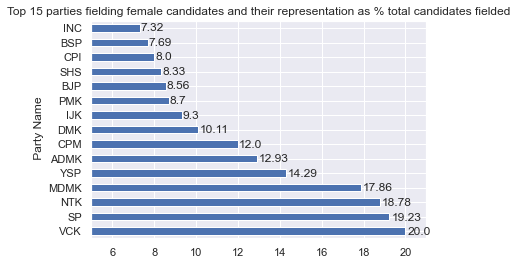

In [15]:
bars=gender[gender.total>23].sort_values('score', ascending=False)[:15].plot(kind='barh',y='score',
                                                                       legend=False,xlim=(5,21),
                                                                        title='Top 15 parties fielding female candidates and their representation as % total candidates fielded',
                                                                        ylabel='percentage')
annotate_bar(bars,h=True)

In [16]:
caste = tn.groupby([' Party Name','Candidate Category'])[['Candidate Name']].count().unstack().fillna(0)
caste.columns=['gen','sc','st']
caste['total'] = caste.sum(axis=1)

caste['score'] = (caste.drop(['gen','total'],axis=1).sum(axis=1)/caste.total)*100

caste.sort_values('score',ascending=False)

,gen,sc,st,total,score
Party Name,,,,,
RPI,0.0,5.0,0.0,5.0,100.000000
MSKK,0.0,1.0,0.0,1.0,100.000000
JASD,0.0,1.0,0.0,1.0,100.000000
PT,0.0,4.0,0.0,4.0,100.000000
JKNPP,0.0,2.0,0.0,2.0,100.000000
AIPMK,0.0,2.0,0.0,2.0,100.000000
MAKKK,0.0,1.0,0.0,1.0,100.000000
INMMK,0.0,1.0,0.0,1.0,100.000000
DMMK,0.0,1.0,0.0,1.0,100.000000


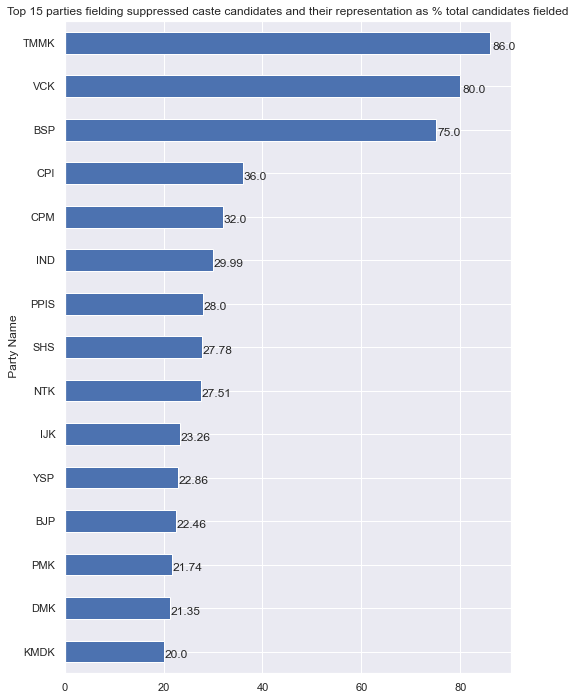

In [17]:
bars=caste[caste.total>23].sort_values('score',ascending=False)['score'][:15].plot(kind='barh',legend=False,figsize=(8,12),
                                                                             title='Top 15 parties fielding suppressed caste candidates and their representation as % total candidates fielded')

for p in bars.patches:
    bars.annotate(str(round(p.get_width(),2)), (p.get_width() * 1.005, p.get_y()+0.4))
plt.gca().invert_yaxis()

In [18]:
total_votes_polled = tn.drop_duplicates('Constituency Name')['Total Votes'].sum()

party = tn.groupby(' Party Name')[[' Total Valid Votes','Total Votes']].sum()
party.columns = ['secured_from_contested','total_contested']
party['percent_from_contested'] =100* party.secured_from_contested/party.total_contested

party['total_vote_share'] = 100*(party.secured_from_contested)/total_votes_polled

party.sort_values(['percent_from_contested','total_vote_share'],ascending=False)[:15]

,secured_from_contested,total_contested,percent_from_contested,total_vote_share
Party Name,,,,
DMK,13669116.0,33289620.0,41.061196,31.637695
ADMK,17616266.0,43205158.0,40.773525,40.773525
INC,2774075.0,7607278.0,36.466066,6.420703
IUML,313808.0,949053.0,33.065382,0.726321
PT,219830.0,671591.0,32.732720,0.508805
MAMAK,197150.0,687616.0,28.671526,0.456311
CPI,340290.0,4724513.0,7.202647,0.787614
MDMK,373606.0,5276374.0,7.080734,0.864725
VCK,331849.0,4784927.0,6.935299,0.768077


<AxesSubplot:title={'center':'TN general elections 2016'}>

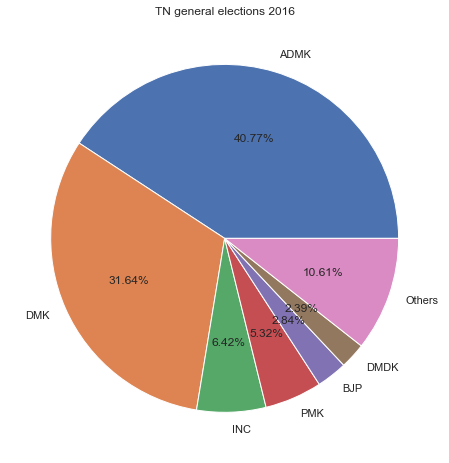

In [19]:
top = party.sort_values('total_vote_share', ascending=False)[['total_vote_share']][:6]
top.loc['Others'] = 100-top.sum()
top.plot.pie(y='total_vote_share',autopct="%.2f%%",figsize=(8,8),legend=False,
             ylabel='',title='TN general elections 2016')

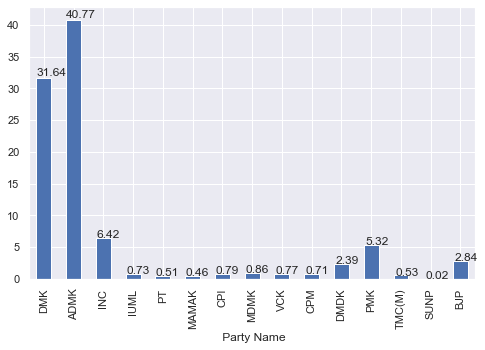

In [20]:
ax=party.sort_values(['percent_from_contested','total_vote_share'],ascending=False)['total_vote_share'][:15].plot(kind='bar',
                                                                                                              figsize=(8,5))
annotate_bar(ax)

In [52]:
tn = pd.read_excel(files[1],header=2).dropna()
tn.columns = ['number','constituency','candidate','sex','age','category','party','general_votes','postal_votes', 'valid_votes','electors','total_votes']
tn['year'] = 2016
tn.head()

,number,constituency,candidate,sex,age,category,party,general_votes,postal_votes,valid_votes,electors,total_votes,year
0,1,Gummidipoondi,VIJAYAKUMAR K S,M,45.0,GEN,ADMK,89021.0,311.0,89332.0,260912.0,214348.0,2016
1,1,Gummidipoondi,SEKAR C H,M,37.0,GEN,DMK,65197.0,740.0,65937.0,260912.0,214348.0,2016
2,1,Gummidipoondi,SELVARAJ M,M,44.0,GEN,PMK,42890.0,165.0,43055.0,260912.0,214348.0,2016
3,1,Gummidipoondi,GEETHA K,F,33.0,GEN,DMDK,6563.0,22.0,6585.0,260912.0,214348.0,2016
4,1,Gummidipoondi,BHASKARAN M,M,53.0,GEN,BJP,2081.0,11.0,2092.0,260912.0,214348.0,2016


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [53]:
le = LabelEncoder()

le.fit(tn['constituency'])
tn['constituency_code'] = le.transform(tn['constituency'])

le.fit(tn['candidate'])
tn['candidate_code'] = le.transform(tn['candidate'])

le.fit(tn['sex'])
tn['sex_code'] = le.transform(tn.sex)

le.fit(tn.category)
tn['category_code'] = le.transform(tn.category)

le.fit(tn.party)
tn['party_code'] = le.transform(tn.party)

le.fit(tn.year)
tn['year_code'] = le.transform(tn.year)

In [54]:

X = tn.drop(['number','total_votes','valid_votes','general_votes','postal_votes','constituency','candidate','sex',
            'category','party','year'],axis=1)
y = tn['valid_votes']

In [55]:
tn_copy= tn.copy()
le.fit(tn.party)
tn_copy.index=le.inverse_transform(tn.party_code)
tn_copy.head()

,number,constituency,candidate,sex,age,category,party,general_votes,postal_votes,valid_votes,electors,total_votes,year,constituency_code,candidate_code,sex_code,category_code,party_code,year_code
ADMK,1,Gummidipoondi,VIJAYAKUMAR K S,M,45.0,GEN,ADMK,89021.0,311.0,89332.0,260912.0,214348.0,2016,51,3536,1,0,1,0
DMK,1,Gummidipoondi,SEKAR C H,M,37.0,GEN,DMK,65197.0,740.0,65937.0,260912.0,214348.0,2016,51,2774,1,0,20,0
PMK,1,Gummidipoondi,SELVARAJ M,M,44.0,GEN,PMK,42890.0,165.0,43055.0,260912.0,214348.0,2016,51,2831,1,0,54,0
DMDK,1,Gummidipoondi,GEETHA K,F,33.0,GEN,DMDK,6563.0,22.0,6585.0,260912.0,214348.0,2016,51,767,0,0,19,0
BJP,1,Gummidipoondi,BHASKARAN M,M,53.0,GEN,BJP,2081.0,11.0,2092.0,260912.0,214348.0,2016,51,400,1,0,11,0


In [99]:
X.sort_values('candidate_code').tail()

,age,electors,constituency_code,candidate_code,sex_code,category_code,party_code,year_code
321,29.0,214976.0,172,3604,1,1,69,0
810,27.0,247501.0,144,3605,1,1,12,0
925,31.0,212306.0,5,3606,1,0,35,0
2567,49.0,219337.0,93,3607,1,0,35,0
181,42.0,284010.0,183,3608,1,0,35,0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
clf.score(X_test,y_test)

0.912616259996347

In [94]:
le.fit(tn.party)
results = X_test.copy()
results['party'] =le.inverse_transform(X_test.party_code)
results['predicted_votes'] = clf.predict(X_test)
results['actual_votes'] = y_test
results.head(6)

,age,electors,constituency_code,candidate_code,sex_code,category_code,party_code,year_code,party,predicted_votes,actual_votes
2899,92.0,253227.0,180,1166,1,0,20,0,DMK,79774.86,121473.0
3733,49.0,220737.0,116,3145,1,1,1,0,ADMK,80808.17,65071.0
2915,55.0,253606.0,109,1077,1,0,1,0,ADMK,60074.43,100918.0
386,44.0,188171.0,52,3049,1,0,35,0,IND,150.01,81.0
829,52.0,249715.0,220,39,1,0,83,0,VCK,12345.53,2590.0
1918,52.0,207641.0,9,2953,1,0,35,0,IND,346.12,212.0


In [ ]:
(results.electors-results.predicted)

In [103]:
def vote_share(results):
    total_votes = results.drop_duplicates('constituency_code')['electors'].sum()

    grouped = results.groupby('party')[['actual_votes','predicted_votes','electors']].sum()
    grouped['actual_voteshare'] = 100*grouped.actual_votes/total_votes
    grouped['predicted_voteshare'] = 100*grouped.predicted_votes/total_votes

    grouped['actual_winshare'] = 100 * grouped.actual_votes/grouped.electors
    grouped['predicted_winshare'] = 100 * grouped.predicted_votes/grouped.electors

    grouped.head()
    return grouped

In [178]:
vs = vote_share(results)

print(100-vs.sort_values('actual_voteshare',ascending=False)[:10]['actual_voteshare'].sum())
vs.sort_values('actual_voteshare',ascending=False)[:10]


75.08443608615924


,actual_votes,predicted_votes,electors,actual_voteshare,predicted_voteshare,actual_winshare,predicted_winshare
party,,,,,,,
ADMK,5779768.0,5803482.140,18942615.0,10.106099,10.147564,30.511986,30.637175
DMK,5454450.0,5370409.650,17756341.0,9.537271,9.390323,30.718322,30.245024
INC,1011587.0,1024105.920,3718062.0,1.768790,1.790680,27.207373,27.544079
PMK,726107.0,736664.900,20532260.0,1.269620,1.288081,3.536420,3.587841
DMDK,393455.0,350207.280,8725904.0,0.687968,0.612348,4.509046,4.013421
BJP,352315.0,437057.370,14844124.0,0.616033,0.764208,2.373431,2.944312
IND,175127.0,236909.926,130092052.0,0.306215,0.414244,0.134618,0.182109
CPM,128016.0,111589.610,2334196.0,0.223840,0.195118,5.484372,4.780644
NTK,121289.0,184105.280,15101368.0,0.212077,0.321914,0.803166,1.219130


In [129]:
(vs.actual_winshare >=0 ).all()

True

In [180]:
def pie_chart(vs,order =6,title='TN general elections'):
    plt.subplot(121)
         
    top = vs.sort_values('actual_voteshare',ascending=False)[:order]['actual_voteshare']
    top.loc['others'] = 100-top.sum()
    top.plot(kind='pie',y='actual_voteshare',autopct="%.2f%%",figsize=(12,8),legend=False,
                 ylabel='',title='{}_actual '.format(title))
   

    plt.subplot(122)
    top = vs.sort_values('predicted_voteshare',ascending=False)[:order]['predicted_voteshare']
    top.loc['others'] = 100-top.sum()
    top.plot(kind='pie',y='predicted_voteshare',autopct="%.2f%%",figsize=(12,8),legend=True,
                 ylabel='',title='{}_predicted '.format(title))
    plt.tight_layout()    

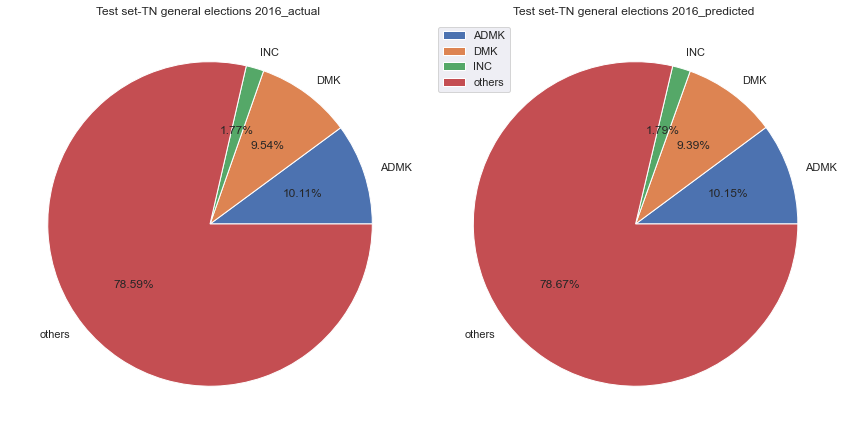

In [181]:
pie_chart(vs,order=3,title='Test set-TN general elections 2016')